# Deteccion de Esquinas Harris
Por: Fernando Pérez Gómez

Algoritmo:
    1. Compute x and y derivatives of image
$$
I_x = G_{\sigma }^{x} * I \\
I_y = G_{\sigma }^{y} * I
$$
    2. Compute products of derivatives at every pixel
$$
I_{x2} = I_x . I_x \\
I_{y2} = I_y . I_y \\
I_{xy} = I_x . I_y
$$
    3. Compute the sums of the products of derivatives at each pixel
    
$$
S_{x2} = G_{\sigma ' } * I_{x2} \\
S_{y2} = G_{\sigma ' } * I_{y2} \\
S_{xy} = G_{\sigma ' } * I_{xy} \\
$$

    4. Define at each pixel(x,y) the matrix
$$
H(x,y) =
\left(\begin{array}{cc} 
S_{x2}(x,y) & S_{xy}(x,y)\\
S_{xy}(x,y) & S_{y2}(x,y)
\end{array}\right)
$$ 
    5. Compute the response of the detector at each pixel 
$$ R = Det(H) - k(Trace(H))^2 $$
    where: $$ Trace = S_{x2} + S_{y2}$$
    k is an empirically determined constant; k = 0.04 - 0.06 
    6. Threshold on value of R. Compute nonmax suppression

In [1]:
# Importamos librerias
from cv2 import filter2D
from scipy import misc
from scipy import signal
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Definimos algunas constantes

# Path de la imagen
imgPath = 'inputs/0.jpg'
# imgPath = 'inputs/1.jpg'
# imgPath = 'inputs/2.jpg'
# imgPath = 'inputs/3.jpg'
# imgPath = 'inputs/4.png'



# Filtros derivadores
kernelX = np.array([[0, 0],
                    [-1,1],
                    [0, 0]])

kernelY = np.array([[0, -1, 0],
                    [0, 1,  0]])



In [3]:
# Definimos algunas funciones

# """
# Esta funcion convierte una imagen a escala de grises
# """
def convertirEscalaGris(img):
    return (0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2])


# """
# Esta funcion realiza un filtro gaussiano para eliminar el ruido
# NOTE: Usando signal tenia problemas al multiplicar matrices por el tamaño
# """
def filtroGaussiano(image, s=5):
    n = int(6*s + 0.5)
    f = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            f[i,j] = np.exp((-(i-n/2)**2-(j-n/2)**2)/(2*s**2))
    k = np.sum(f)
    f = f/k
    return filter2D(image, -1, f)

c:\python27\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


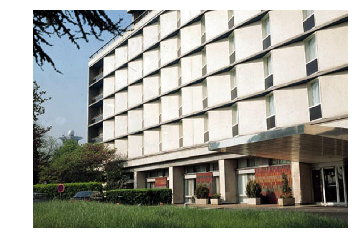

(600, 868)

In [4]:
# Cargamos la imagen y la convertimos en escala de grises
_img = misc.imread(imgPath)
img = convertirEscalaGris(_img)

# Mostramos la imagen que vamos a utilizar
plt.imshow(_img, cmap='gray')
plt.axis('off')
plt.show()

img.shape

### 1. Compute x and y derivatives of image

\begin{align}
I_x = G_{\sigma }^{x} * I \\
I_y = G_{\sigma }^{y} * I
\end{align}

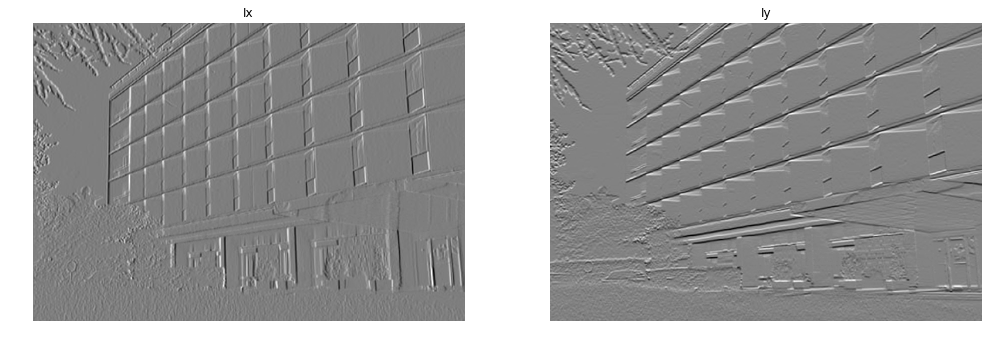

In [5]:
# Se obtiene la derivada gaussiana de Ix e Iy
Ix, Iy = filtroGaussiano(filter2D(img, -1, kernelX), 1), filtroGaussiano(filter2D(img, -1, kernelY), 1) 

# Mostramos los resultados
plt.figure(figsize=(17,17))
plt.subplot(121)
plt.title('Ix')
plt.imshow(Ix,cmap = 'gray')
plt.axis("off")
plt.subplot(122)
plt.title('Iy')
plt.imshow(Iy, cmap = 'gray')
plt.axis("off")
plt.show()

### 2. Compute products of derivatives at every pixel

In [6]:
Ix2 = Ix * Ix
Iy2 = Iy * Iy
Ixy = Ix * Iy

Ix2.shape, Iy2.shape, Ixy.shape

((600, 868), (600, 868), (600, 868))

### 3. Compute the sums of the products of derivatives at each pixel

In [7]:
Sx2 = filtroGaussiano(image=Ix2, s=1)
Sy2 = filtroGaussiano(image=Iy2, s=1)
Sxy = filtroGaussiano(image=Ixy, s=1)

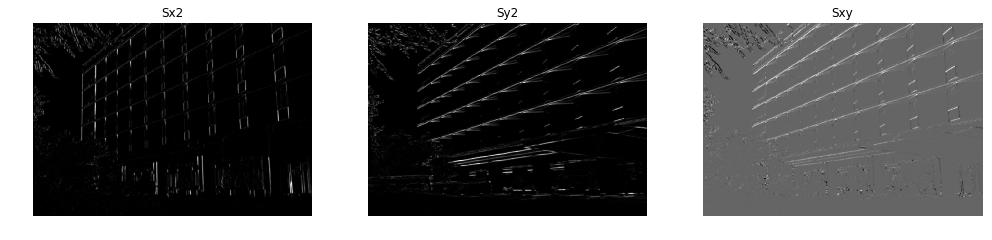

In [8]:
# Mostramos
plt.figure(figsize=(17,17))

plt.subplot(131)
plt.title('Sx2')
plt.imshow(Sx2,cmap = 'gray')
plt.axis("off")

plt.subplot(132)
plt.title('Sy2')
plt.imshow(Sy2,cmap = 'gray')
plt.axis("off")

plt.subplot(133)
plt.title('Sxy')
plt.imshow(Sxy,cmap = 'gray')
plt.axis("off")

plt.show()

### 4. Define at each pixel(x,y) the matrix   &    5.Compute the response of the detector at each pixel

In [9]:
# 4. Matriz H [[Sx2, Sxy], [Sxy, Sy2]]

# 5. Obtenemos el determinante de la matriz
dH = (Sx2 * Sy2) - (Sxy * Sxy)

k = 0.04 
traceH = Sx2 + Sy2
R = dH - (k * (traceH**2))

### 6. Threshold on value of R. Compute nonmax suppression

-586941.3276291002 681891.68884587


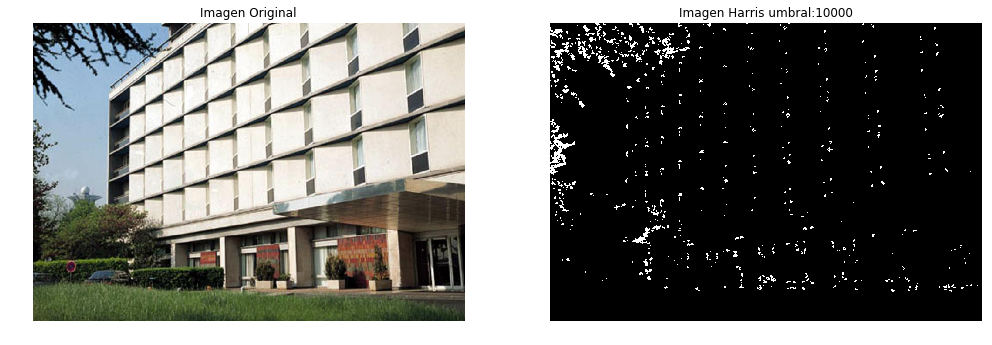

In [10]:
print R.min(),R.max()

umbral = 10000
binImgHarris = R > umbral

# Mostramos los resultados
plt.figure(figsize=(17,17))
plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(_img,cmap = 'gray')
plt.axis("off")
plt.subplot(122)
plt.title('Imagen Harris umbral:'+str(umbral))
plt.imshow(binImgHarris, cmap = 'gray')
plt.axis("off")
plt.show()

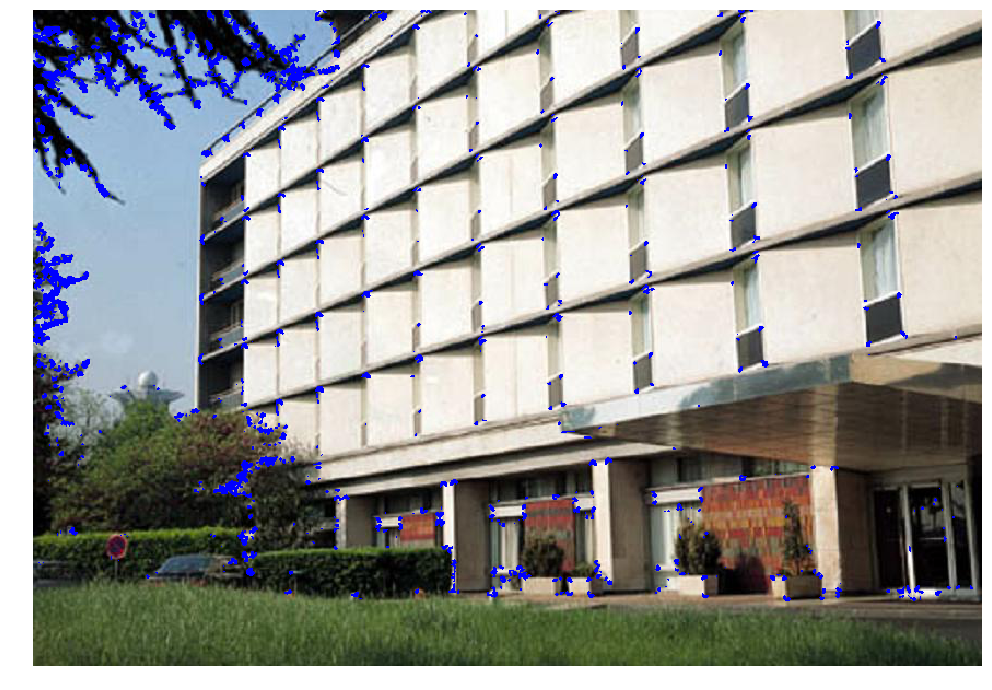

In [11]:
# Imagen original con el detector de esquinas
_img[binImgHarris]=[0,0,255]
# Mostramos la imagen que vamos a utilizar
plt.figure(figsize=(17,17))
plt.imshow(_img, cmap='gray')
plt.axis('off')
plt.show()

## Usando OpenCV
Ejemplo original para la implementacion de Harris en: 

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

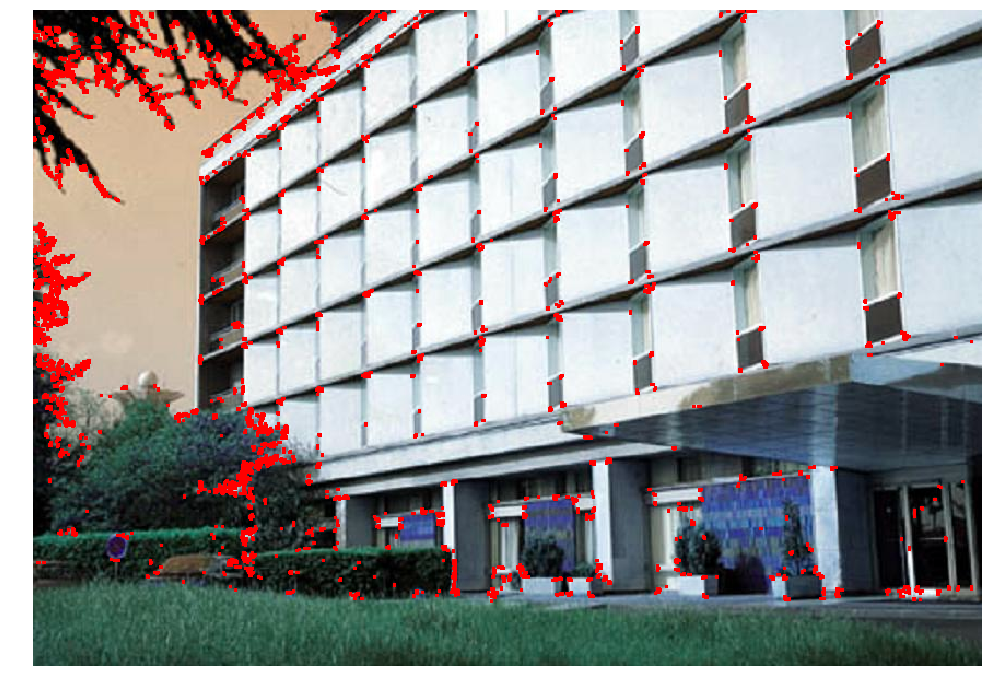

In [12]:
import cv2

imgCV = cv2.imread(imgPath)
gray = cv2.cvtColor(imgCV,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
imgCV[dst>0.01*dst.max()]=[255,0,0]

plt.figure(figsize=(17,17))
plt.imshow(imgCV)
plt.axis('off')
plt.show()